In [12]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt 
import seaborn
import datetime

In [18]:
url = "https://covid.ourworldindata.org/data/owid-covid-data.json"
data = requests.get(url).json()
EUCountries = []
AsiaCountries = []

for country in data:
    if "continent" in data[country]:
        if "Europe" in data[country]["continent"]:
            EUCountries.append(country)
            print(country + " " + data[country]["continent"] + " " + str(data[country]["location"]))

for country in data:
    if "continent" in data[country]:
        if "Asia" in data[country]["continent"]:
            AsiaCountries.append(country)
            print(country + " " + data[country]["continent"] + " " + str(data[country]["location"]))
          
EUCountries.remove("GBR") #it has negative new_cases
print(EUCountries)
print(AsiaCountries)

ALB Europe Albania
AND Europe Andorra
AUT Europe Austria
BLR Europe Belarus
BEL Europe Belgium
BIH Europe Bosnia and Herzegovina
BGR Europe Bulgaria
HRV Europe Croatia
CYP Europe Cyprus
CZE Europe Czech Republic
DNK Europe Denmark
EST Europe Estonia
FRO Europe Faeroe Islands
FIN Europe Finland
FRA Europe France
DEU Europe Germany
GIB Europe Gibraltar
GRC Europe Greece
GGY Europe Guernsey
HUN Europe Hungary
ISL Europe Iceland
IRL Europe Ireland
IMN Europe Isle of Man
ITA Europe Italy
JEY Europe Jersey
OWID_KOS Europe Kosovo
LVA Europe Latvia
LIE Europe Liechtenstein
LTU Europe Lithuania
LUX Europe Luxembourg
MKD Europe Macedonia
MLT Europe Malta
MDA Europe Moldova
MCO Europe Monaco
MNE Europe Montenegro
NLD Europe Netherlands
NOR Europe Norway
POL Europe Poland
PRT Europe Portugal
ROU Europe Romania
RUS Europe Russia
SMR Europe San Marino
SRB Europe Serbia
SVK Europe Slovakia
SVN Europe Slovenia
ESP Europe Spain
SWE Europe Sweden
CHE Europe Switzerland
UKR Europe Ukraine
GBR Europe Unit

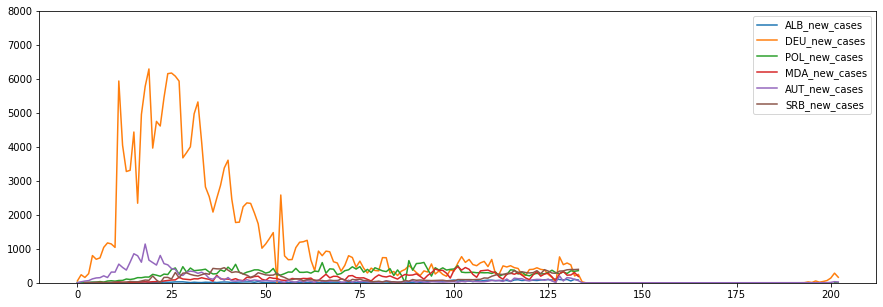

In [14]:
columns = ["date"]
covidPlot = pd.DataFrame(columns = columns)

for country in EUCountries:
        columns = ["date", country+"_new_cases"]
        dates = []
        new_cases = []
        for countryData in data[country]["data"]:
                if "new_cases" in countryData:
                        new_cases.append(countryData["new_cases"])
                        dates.append(countryData["date"])
        newDf = pd.DataFrame(columns = columns)
        newDf["date"], newDf[country+"_new_cases"] = [dates, new_cases]
        covidPlot = pd.merge(covidPlot, newDf, on='date', how='outer')

covidPlot.plot(ylim=[0, 8000], y=["ALB_new_cases", "DEU_new_cases", "POL_new_cases", "MDA_new_cases", "AUT_new_cases", "SRB_new_cases"],figsize=(15,5)) 

In [20]:
columns = ["date", "Country", "new_cases"]
testPlot = pd.DataFrame(columns = columns)
#allDates = pd.date_range(start="31/12/2019", end=datetime.datetime.now().date())
    

for country in EUCountries:
       dates = []
       new_cases = []
       for countryData in data[country]["data"]:
              if "new_cases" in countryData:
                     new_cases.append(countryData["new_cases"])
                     dates.append(countryData["date"])
       if len(allDates) == len(new_cases): #only getting full data with every date
              newDf = pd.DataFrame(columns = columns)
              newDf["date"], newDf["Country"], newDf["new_cases"] = [dates, country, new_cases]
              testPlot = pd.concat([testPlot, newDf])

testPlot.to_csv("europe.csv")
testPlot = pd.DataFrame(columns = columns)

for country in AsiaCountries:
       dates = []
       new_cases = []
       for countryData in data[country]["data"]:
              if "new_cases" in countryData:
                     new_cases.append(countryData["new_cases"])
                     dates.append(countryData["date"])
       if len(allDates) == len(new_cases): #only getting full data with every date
              newDf = pd.DataFrame(columns = columns)
              newDf["date"], newDf["Country"], newDf["new_cases"] = [dates, country, new_cases]
              testPlot = pd.concat([testPlot, newDf])

testPlot.to_csv("asia.csv")
print(testPlot)

date Country  new_cases
0    2019-12-31     CHN       27.0
1    2020-01-01     CHN        0.0
2    2020-01-02     CHN        0.0
3    2020-01-03     CHN       17.0
4    2020-01-04     CHN        0.0
..          ...     ...        ...
198  2020-07-16     KOR       61.0
199  2020-07-17     KOR       60.0
200  2020-07-18     KOR       39.0
201  2020-07-19     KOR       34.0
202  2020-07-20     KOR       26.0

[1015 rows x 3 columns]


In [16]:
testPlot.to_csv("europe.csv")